## UNSUPERVISED LEARNING MINI PROJECT

### CONTEXT

> E-commerce has become a new channel to support businesses development. Through e-commerce, businesses can get access and establish a wider market presence by providing cheaper and more efficient distribution channels for their products or services. E-commerce has also changed the way people shop and consume products and services. Many people are turning to their computers or smart devices to order goods, which can easily be delivered to their homes.

### CONTENT
> This is a sales transaction data set of UK-based e-commerce (online retail) for one year. This London-based shop has been selling gifts and homewares for adults and children through the website since 2007. Their customers come from all over the world and usually make direct purchases for themselves. There are also small businesses that buy in bulk and sell to other customers through retail outlet channels.

> The data set contains 500K rows and 8 columns. The following is the description of each column.

> - **TransactionNo (categorical)**: a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
> - **Date (numeric)**: the date when each transaction was generated.
> - **ProductNo (categorical)**: a five or six-digit unique character used to identify a specific product.
> - **Product (categorical)**: product/item name.
> - **Price (numeric)**: the price of each product per unit in pound sterling (£).
> - **Quantity (numeric)**: the quantity of each product per transaction. Negative values related to cancelled transactions.
> - **CustomerNo (categorical)**: a five-digit unique number that defines each customer.
> - **Country (categorical)**: name of the country where the customer resides.

### GOAL

> Gather useful intrinsic information by combining RFM model and some unsupervised learning model. 

> For each segments, analyze the data, and try to answer the following questions:

> - How was the sales trend over the months?
> - What are the most frequent purchased products?
> - How many products does the customer purchase in each transaction?
> - How does each cluster/group contribute to the company's revenue?
> - What are the interval date between transactions?
> - Based on your findings, what strategy could you recommend to the business to gain more profit?
> - ***add more if necessary***

> Also, there is a small percentage of order cancellation in the data set. Most of these cancellations were due to out-of-stock conditions on some products. Under this situation, customers tend to cancel an order as they want all products delivered all at once. 

> Therefore, try to build a supervised learning model to solve this problem.

> Source from UCI Machine Learning Repository: [link to dataset](https://archive.ics.uci.edu/ml/datasets/online+retail)

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

# Library untuk clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import KFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from imblearn import FunctionSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
# Library untuk DB Index untuk mengukur hasil clustering
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

> Here we will inspect the data for quality checking.

In [2]:
# load data
df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [3]:
# check head
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


> We can see that there are 2 features with missing values (null).

In [5]:
# check null
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## PREPROCESSING

> Since many of the missing values is on the important features (CustomerID), and it's considered as an identifier that will plays an important role to the RFM models, therefore we cannot do anything to this other than dropping the values on this features.

In [6]:
# dropna
df = df.dropna()

In [7]:
# check info after dropping
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


> Since the missing values has been handled, next we will try to create a new features (TotalCost) that will play an important role on RFM for monetary value later.

> *TotalCost = Quantity x UnitPrice*.

In [8]:
# create TotalCost
df["TotalCost"] = df["Quantity"]*df["UnitPrice"]

In [9]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


> Then we will adjust the InvoiceDate format. We will create a new feature for it, so that it will fit the RFM model.

In [10]:
# create new feature and change its type
df["TransactionDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

In [11]:
# check new features
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost,TransactionDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


> We will also prepare the 'target' feature for supervised prediction later.

In [12]:
# prepare target feature, 1 : cancelled order, 0 : completed order
cancel = []
for i in df["InvoiceNo"]:
    if str(i).startswith("C"):
        cancel.append(1)
    else:
        cancel.append(0)

In [13]:
# apply target
df["cancelled"] = cancel

In [14]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        406829 non-null  object        
 1   StockCode        406829 non-null  object        
 2   Description      406829 non-null  object        
 3   Quantity         406829 non-null  int64         
 4   InvoiceDate      406829 non-null  datetime64[ns]
 5   UnitPrice        406829 non-null  float64       
 6   CustomerID       406829 non-null  float64       
 7   Country          406829 non-null  object        
 8   TotalCost        406829 non-null  float64       
 9   TransactionDate  406829 non-null  datetime64[ns]
 10  cancelled        406829 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 37.2+ MB


> Now that we've finished the preprocess, we will copy the data and then start to build the rfm model.

In [15]:
# create copy for rfm modeling
df1 = df.copy()

## RFM MODEL BUILDING

> RFM is the process of analyzing customer behavior. This model is used based on three variables, interval date between transaction, the frequency of transaction, and the monetary amount of transaction for each customer.

In [16]:
# last transaction date on invoice
now = pd.to_datetime(df1['TransactionDate'].max())

In [17]:
# get customers last transaction date
recency = df1.groupby(by = 'CustomerID', as_index=False)['TransactionDate'].max()
recency.columns = ['CustomerID', 'LastTransactionDate']

# calculate recency
recency['LastTransactionDate'] = pd.to_datetime(recency['LastTransactionDate'])
recency['recency'] = recency['LastTransactionDate'].apply(lambda x: (now-x).days)

In [18]:
recency.head()

,CustomerID,LastTransactionDate,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [19]:
# calculate frequency
frequency = pd.DataFrame()
frequency['CustomerID'] = [i for i in df1['CustomerID'].unique()]
frequency['frequency'] = df1.groupby('CustomerID')['CustomerID'].transform('count')
frequency["frequency"] = df.groupby('CustomerID', as_index=False)["CustomerID"].count()

In [20]:
# calculate monetary
monetary = df1.groupby(by='CustomerID', as_index = False).agg({'TotalCost':'sum'})
monetary.columns = ['CustomerID', 'monetary']

In [21]:
rf = pd.merge(recency, frequency, on="CustomerID")
rfm = pd.merge(rf, monetary, on='CustomerID')

In [22]:
rfm.head()

,CustomerID,LastTransactionDate,recency,frequency,monetary
0,12346.0,2011-01-18,325,33,0.00
1,12347.0,2011-12-07,2,72,4310.00
2,12348.0,2011-09-25,75,22,1797.24
3,12349.0,2011-11-21,18,454,1757.55
4,12350.0,2011-02-02,310,107,334.40


In [23]:
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])
quantiles

,CustomerID,recency,frequency,monetary
0.25,13812.75,16.0,17.0,293.3625
0.50,15300.50,50.0,42.0,648.0750
0.75,16778.25,143.0,102.0,1611.7250


In [24]:
# function to get quantiles score
# arguments : (x = value, p = recency, monetary_value, frequency, k = quartiles dict)

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [25]:
# rfm segmentation score
rfm['R_Quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles))
rfm['F_Quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['M_Quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))

In [26]:
# calculate rfm score
rfm['RFMScore'] =  rfm["R_Quartile"].map(str) + rfm["F_Quartile"].map(str) + rfm["M_Quartile"].map(str)

In [27]:
rfm.head()

,CustomerID,LastTransactionDate,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
0,12346.0,2011-01-18,325,33,0.00,4,3,4,434
1,12347.0,2011-12-07,2,72,4310.00,1,2,1,121
2,12348.0,2011-09-25,75,22,1797.24,3,3,1,331
3,12349.0,2011-11-21,18,454,1757.55,2,1,1,211
4,12350.0,2011-02-02,310,107,334.40,4,1,3,413


In [28]:
# set segment name, urutannya dari atas
segname=[]
for i,j,k in zip(rfm["RFMScore"], rfm["F_Quartile"], rfm["M_Quartile"]):
    if i == "111":
        segname.append("Best Customers")
    elif i == "311":
        segname.append("Almost Lost")
    elif i == "411":
        segname.append("Lost Customers")
    elif i == "444":
        segname.append("Lost Cheap Customers")
    elif j == 1:
        segname.append("Loyal Customers")
    elif k == 1:
        segname.append("Big Spenders")
    else:
        segname.append("Other")

In [29]:
# get segment name
rfm["segment"] = segname

In [30]:
rfm['segment'].value_counts()

Other                   2327
Loyal Customers          889
Big Spenders             820
Lost Cheap Customers     144
Best Customers           137
Almost Lost               47
Lost Customers             8
Name: segment, dtype: int64

In [31]:
rfm.head()

,CustomerID,LastTransactionDate,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,segment
0,12346.0,2011-01-18,325,33,0.00,4,3,4,434,Other
1,12347.0,2011-12-07,2,72,4310.00,1,2,1,121,Big Spenders
2,12348.0,2011-09-25,75,22,1797.24,3,3,1,331,Big Spenders
3,12349.0,2011-11-21,18,454,1757.55,2,1,1,211,Loyal Customers
4,12350.0,2011-02-02,310,107,334.40,4,1,3,413,Loyal Customers


In [32]:
cnt_seg = rfm.groupby("segment", as_index=False)["CustomerID"].nunique().sort_values(by = "CustomerID", ascending=False).reset_index()

cnt_seg["pct"] = round(cnt_seg["CustomerID"]/sum(cnt_seg["CustomerID"]) *100, 1)

In [33]:
cnt_seg.head()

,index,segment,CustomerID,pct
0,6,Other,2327,53.2
1,5,Loyal Customers,889,20.3
2,2,Big Spenders,820,18.8
3,3,Lost Cheap Customers,144,3.3
4,1,Best Customers,137,3.1


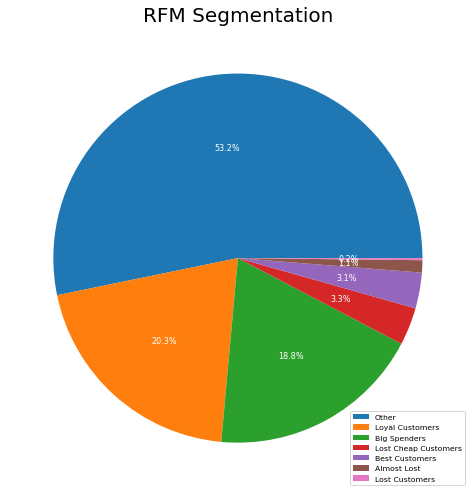

In [34]:
# visualisasi hasil
plt.figure(figsize=(7,7))
plt.pie(cnt_seg["CustomerID"], 
        autopct = '%.1f%%', 
        textprops = {'fontsize' : 8, 
                     'color' : 'white'})
plt.title("RFM Segmentation", fontsize=20)
plt.legend(cnt_seg["segment"], loc='lower right', prop={'size': 7.7})
plt.tight_layout()
plt.show()

In [35]:
# takeout other
seg_new = cnt_seg[cnt_seg["segment"]!="Other"]

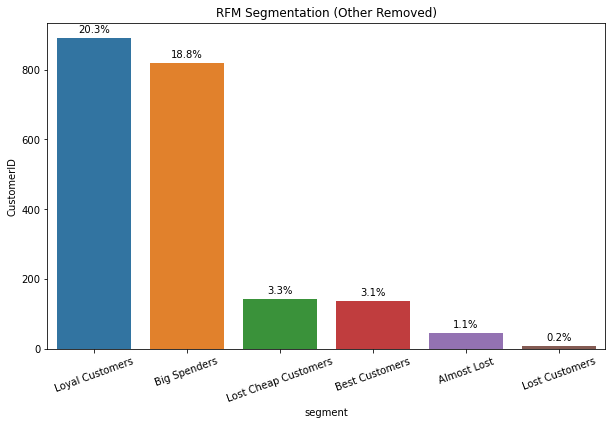

In [36]:
# visualisasi dengan barplot (takeout other segment)
plt.figure(figsize=(10,6))
x = seg_new["segment"]
y = seg_new["CustomerID"]
percentage = [i for i in seg_new["pct"]]
ax = sns.barplot(x=x, y=y)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+15
    ax.annotate(f'{percentage[i]}%', (x, y), ha='center')
plt.title("RFM Segmentation (Other Removed)")
plt.xticks(rotation=20)
plt.show()

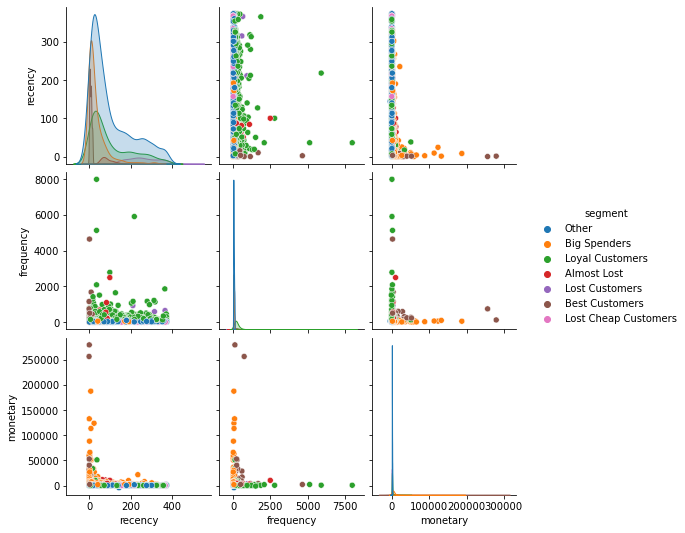

In [37]:
rfm_to_plot = rfm[['recency', 'frequency', 'monetary', 'segment']]
sns.pairplot(rfm_to_plot, hue = "segment")

Summary:
- Jumlah 'Other' segment masih diatas 50%, ini masih dapat dilakukan segmentasi untuk mendapatkan insight segment lebih lanjut.
- Jumlah tertinggi setelah itu adalah pada segment 'Loyal Customers' dan 'Big Spender', artinya jumlah customer sehat masih tinggi. Bisa dibuat program campaign khusus untuk meningkatkan jumlah customer dalam kategori ini.
- Jumlah 'Best Customer' masih rendah, yaitu 3.1%. Sebaiknya dilakukan loyalty program, agar menjaga customer ini.
- Jumlah 'Lost Cheap Customers', 'Lost Customers', dan 'Almost Lost' kurang dari 5%. Untuk menarik customer ini, perlu retargeting terhadap customer tsb, seperti membuat inovasi produk yang sesuai dengan kebutuhan customer ini.

## CLUSTERING

> Cluster analysis is the grouping of objects such that objects in the same cluster are more similar to each other than they are to objects in another cluster.

> Akan digunakan K-means dan elbow method untuk menentukan k cluster yang optimal

In [38]:
# frequency vs monetary
X = np.asarray(rfm[['monetary','frequency']])

In [39]:
# range k dari Kmeans
k = range(1, 10)
inertia = [] 
for i in k:
    model = KMeans(n_clusters = i, max_iter = 1000, random_state=0) # jumlah cluster akan di loop sebanyak k range(9 times)
    model.fit(X)
    inertia.append(model.inertia_)

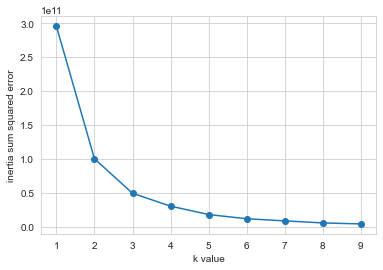

In [40]:
# plot elbow curve
sns.set_style("whitegrid")
plt.plot(k, inertia, "o-")
plt.xlabel('k value')
plt.ylabel('inertia sum squared error')
plt.show()

In [41]:
# fit model Kmeans
model_km = KMeans(n_clusters = 3, max_iter = 1000, random_state = 0)
model_km.fit(X)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [42]:
# predict cluster
rfm["cluster_km"] = model_km.predict(X)

In [43]:
rfm['cluster_km'].value_counts()

0    4346
2      23
1       3
Name: cluster_km, dtype: int64

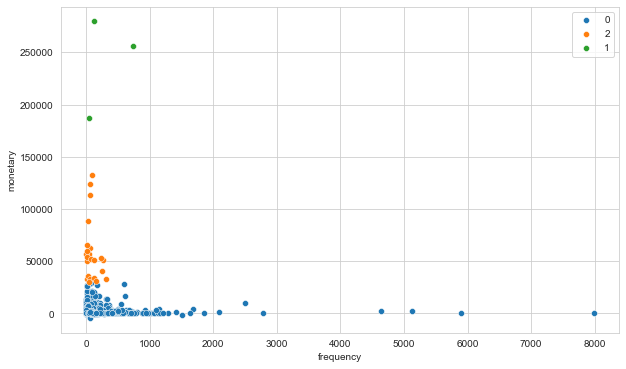

In [44]:
# plot hasil kmeans
plt.figure(figsize = (10,6))
for i in rfm['cluster_km'].unique():
    sns.scatterplot(rfm['frequency'][rfm['cluster_km'] == i], rfm['monetary'][rfm['cluster_km'] == i],label = i)
    
plt.legend()
plt.show()

Summary:
- Dari kurva elbow, dapat dilihat bahwa n cluster yang optimal adalah 3
- Cluster 0 merupakan cluster dengan monetary paling rendah, namun frequency tersebar cukup tinggi
- Cluster 1 merupakan cluster dengan monetary tertinggi
- Cluster 2 merupakan cluster dengan monetary di antara cluster 0 dan 1

## EXPLORATORY DATA ANALYSIS

> Selanjutnya, akan dilakukan data exploration berdasarkan hasil analisis cluster dan RFM untuk mendapat insight dari data

In [45]:

res = pd.merge(df1, rfm, on = "CustomerID")

In [46]:
res['cluster_km'].value_counts()

0    371633
2     32327
1      2869
Name: cluster_km, dtype: int64

In [47]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 406828
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            406829 non-null  object        
 1   StockCode            406829 non-null  object        
 2   Description          406829 non-null  object        
 3   Quantity             406829 non-null  int64         
 4   InvoiceDate          406829 non-null  datetime64[ns]
 5   UnitPrice            406829 non-null  float64       
 6   CustomerID           406829 non-null  float64       
 7   Country              406829 non-null  object        
 8   TotalCost            406829 non-null  float64       
 9   TransactionDate      406829 non-null  datetime64[ns]
 10  cancelled            406829 non-null  int64         
 11  LastTransactionDate  406829 non-null  datetime64[ns]
 12  recency              406829 non-null  int64         
 13  frequency     

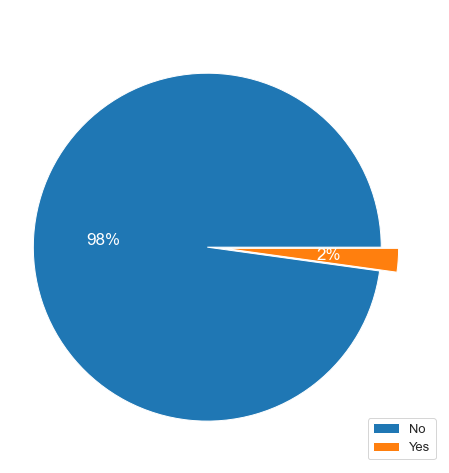

In [74]:
plt.figure(figsize = (12, 8))

plt.title('Cancelled Yes or No?', size = 25, fontweight = 'bold', color = 'white')

labels = 'No', 'Yes'

plt.pie(res['cancelled'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [76]:
res['cancelled'].value_counts()

0    397924
1      8905
Name: cancelled, dtype: int64

> Berdasarkan Pie Chart diatas ada sekitar 98% customer yang tidak membatalkan pesanan, sedangkan ada 2% yang membatalkan pesanan

### How was the sales trend over the months?

In [77]:
c0 = res[(res['cluster_km'] == 0)]
c1 = res[(res['cluster_km'] == 1)]
c2 = res[(res['cluster_km'] == 2)]

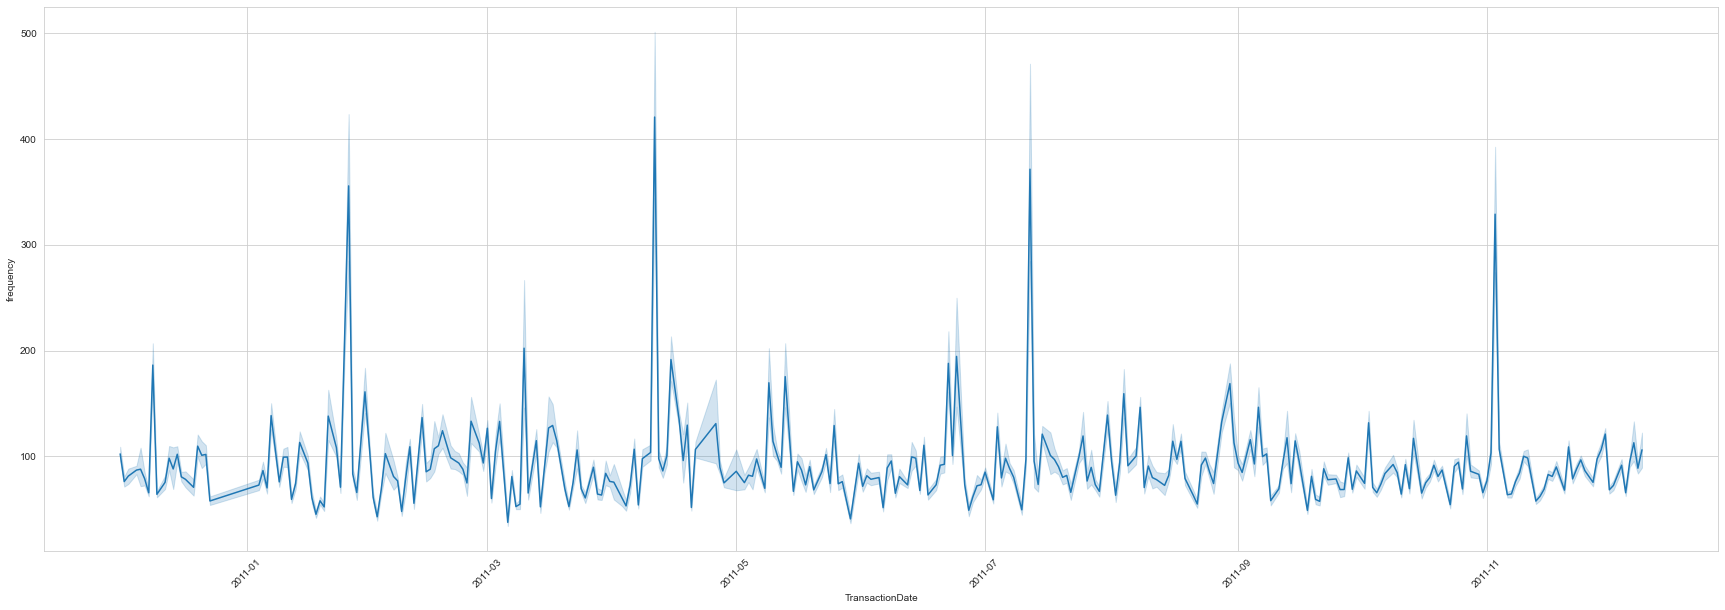

In [78]:
plt.figure(figsize=(30,10))
sns.lineplot(data = c0, x='TransactionDate', y='frequency')
plt.xticks(rotation=45)
plt.show()

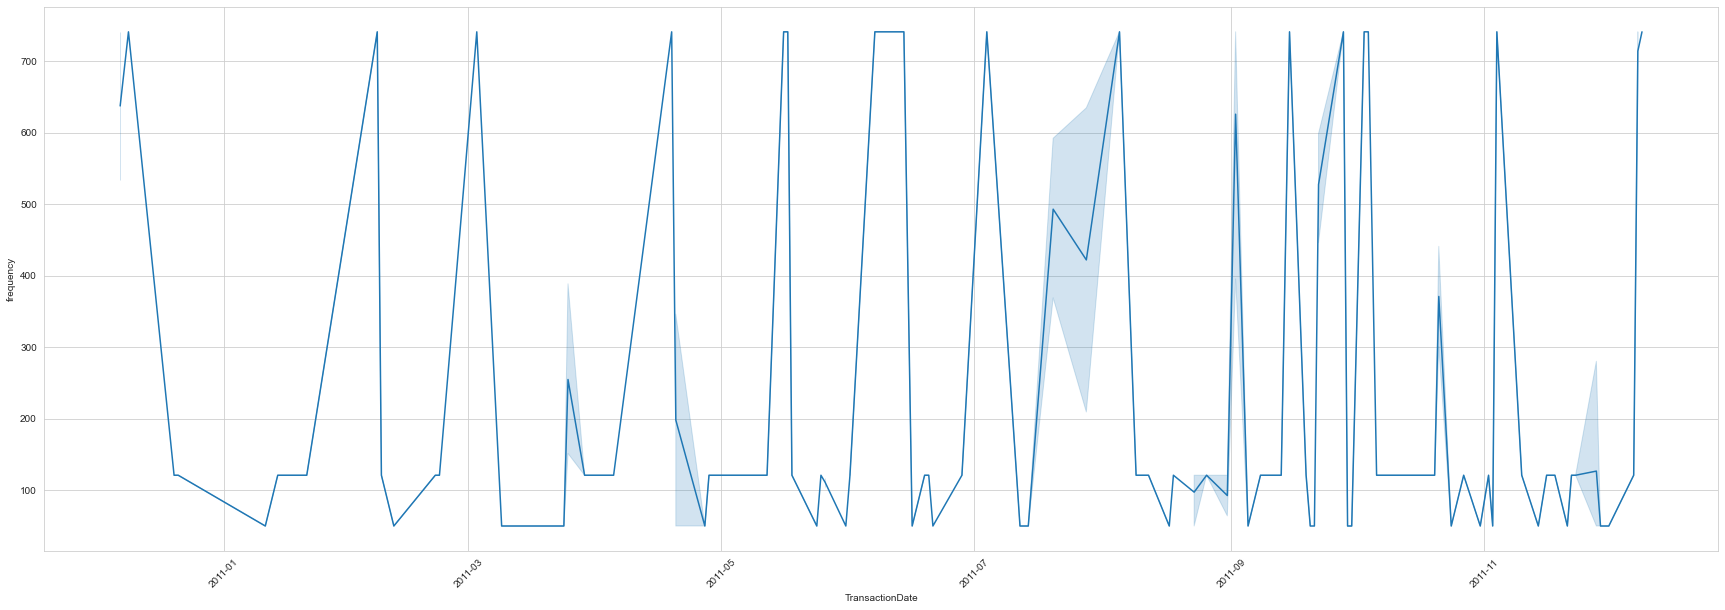

In [79]:
plt.figure(figsize=(30,10))
sns.lineplot(data = c1, x='TransactionDate', y='frequency')
plt.xticks(rotation=45)
plt.show()

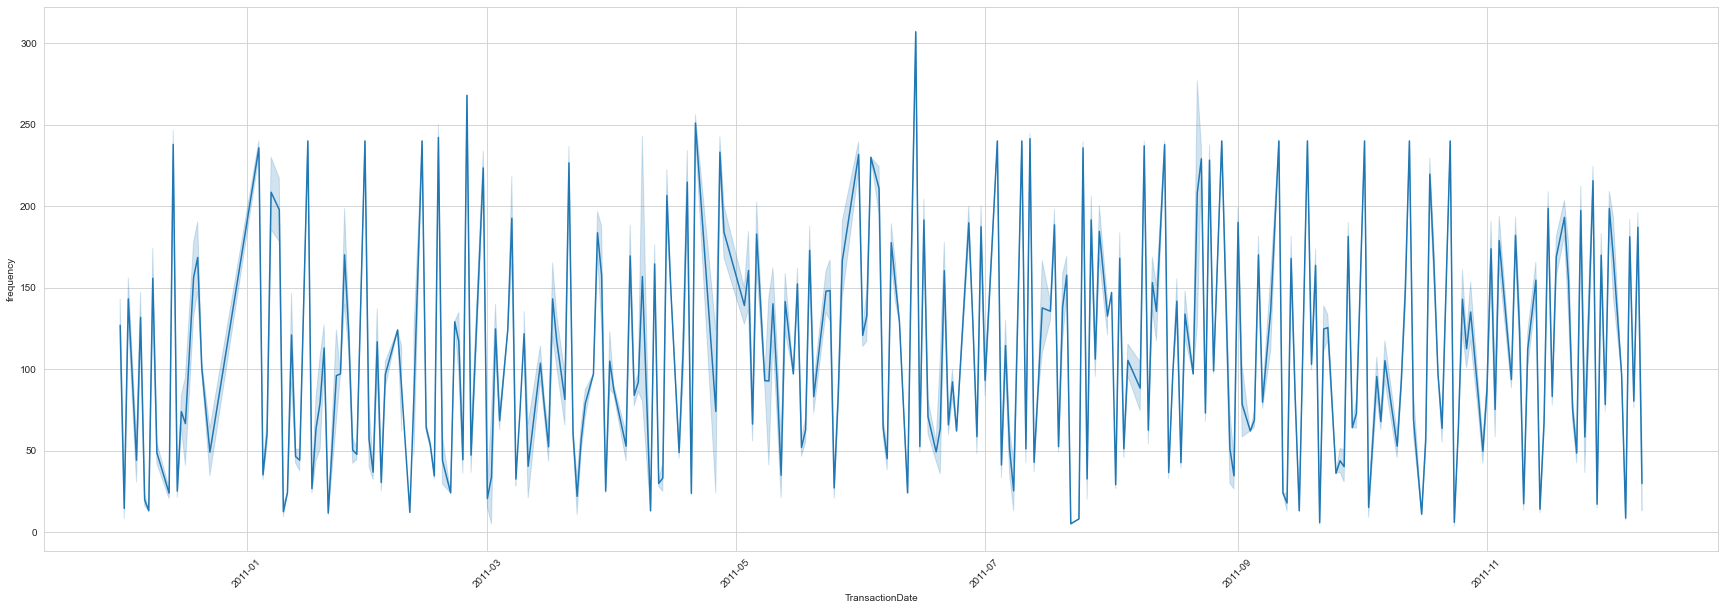

In [80]:
plt.figure(figsize=(30,10))
sns.lineplot(data = c2, x='TransactionDate', y='frequency')
plt.xticks(rotation=45)
plt.show()

### What are the most frequent purchased products?

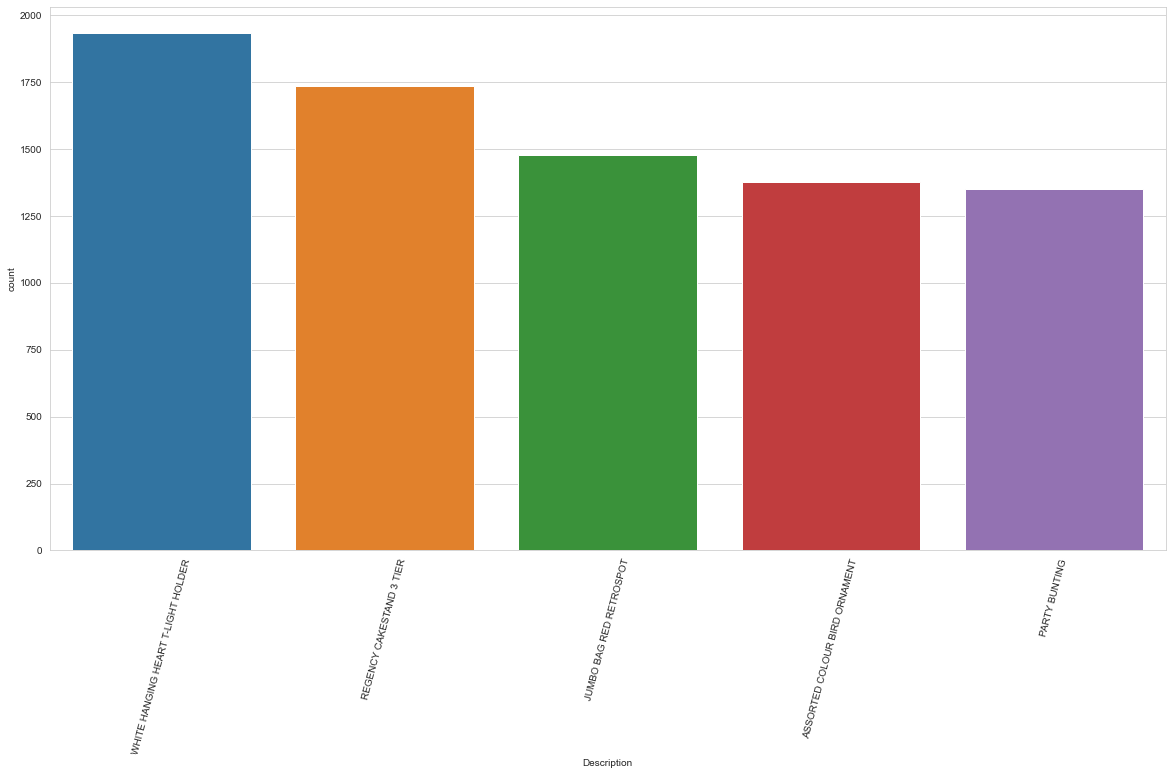

In [120]:
plt.figure(figsize=(20,10))
sns.countplot(data = c0, x ='Description', order=c0.value_counts(c0['Description']).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [87]:
c0.value_counts(c0['Description']).head()

Description
WHITE HANGING HEART T-LIGHT HOLDER    1933
REGENCY CAKESTAND 3 TIER              1734
JUMBO BAG RED RETROSPOT               1476
ASSORTED COLOUR BIRD ORNAMENT         1375
PARTY BUNTING                         1348
dtype: int64

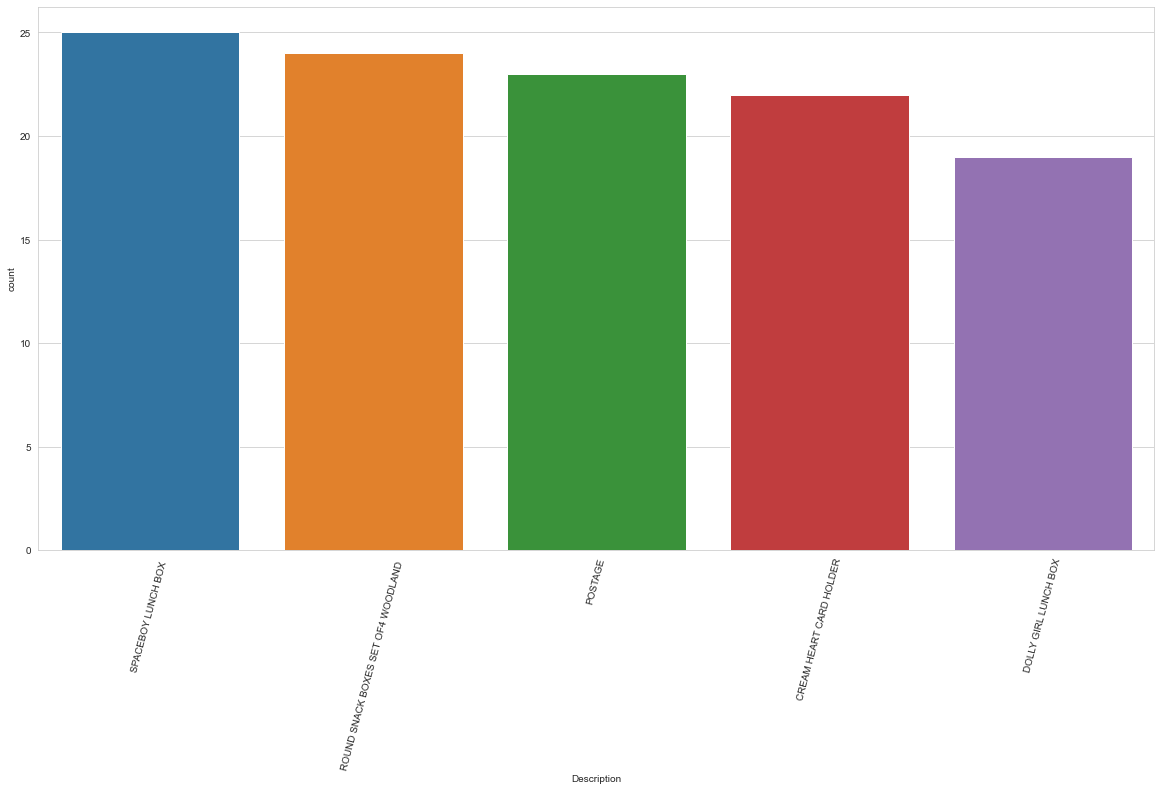

In [121]:
plt.figure(figsize=(20,10))
sns.countplot(data = c1, x ='Description', order=c1.value_counts(c1['Description']).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [117]:
c1.value_counts(c1['Description']).head()

Description
SPACEBOY LUNCH BOX                     25
ROUND SNACK BOXES SET OF4 WOODLAND     24
POSTAGE                                23
CREAM HEART CARD HOLDER                22
DOLLY GIRL LUNCH BOX                   19
dtype: int64

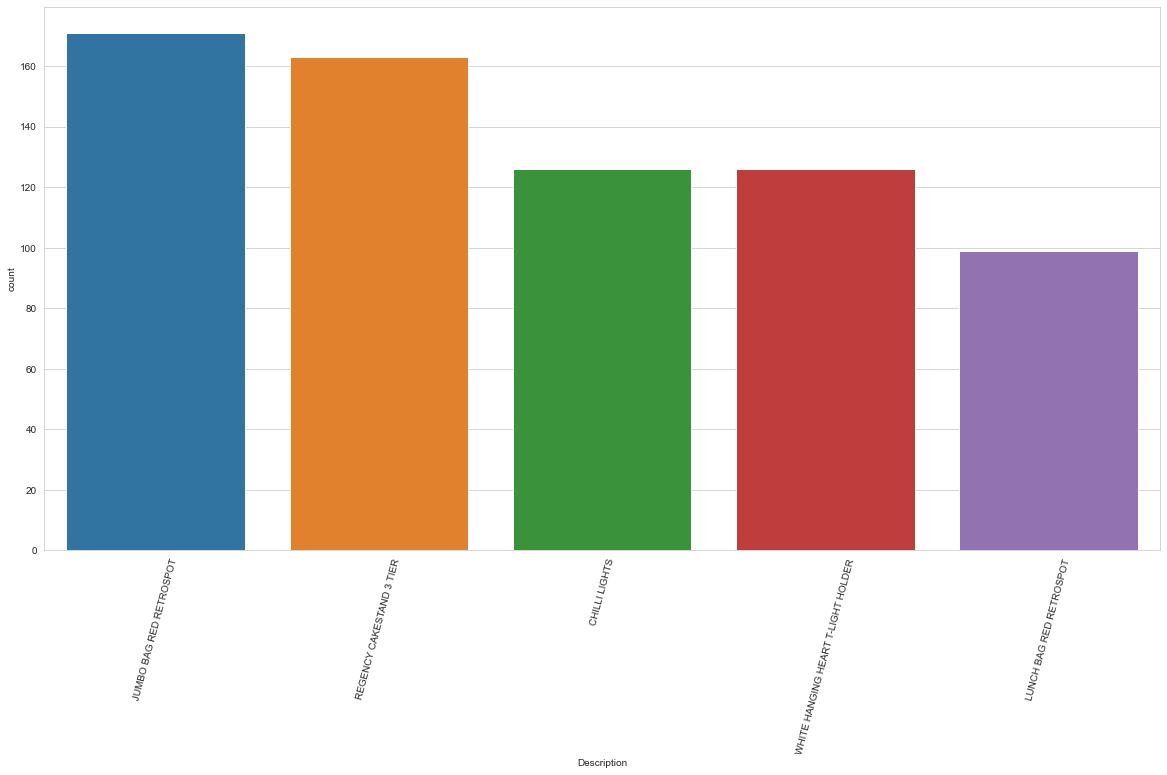

In [122]:
plt.figure(figsize=(20,10))
sns.countplot(data=c2, x='Description', order=c2.value_counts(c2['Description']).iloc[:5].index)
plt.xticks(rotation=75)
plt.show()

In [93]:
c2.value_counts(c2['Description']).head()

Description
JUMBO BAG RED RETROSPOT               171
REGENCY CAKESTAND 3 TIER              163
CHILLI LIGHTS                         126
WHITE HANGING HEART T-LIGHT HOLDER    126
LUNCH BAG RED RETROSPOT                99
dtype: int64

### How many products does the customer purchase in each transaction?

In [96]:
c0['InvoiceNo'].value_counts().head()

567183    399
547063    294
562031    277
554098    264
543040    259
Name: InvoiceNo, dtype: int64

In [97]:
c1['InvoiceNo'].value_counts().head()

572035    125
563076    119
541711    106
562789     96
552883     92
Name: InvoiceNo, dtype: int64

In [98]:
c2['InvoiceNo'].value_counts().head()

576339    542
579196    533
580727    529
578270    442
573576    435
Name: InvoiceNo, dtype: int64

### How does each cluster/group contribute to the company's revenue?

<AxesSubplot:xlabel='cluster_km', ylabel='TotalCost'>

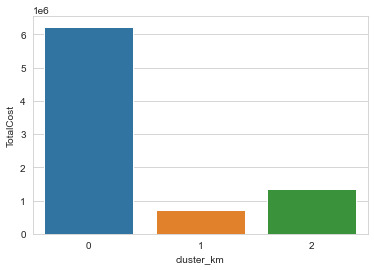

In [103]:
z = res.groupby(by='cluster_km')['TotalCost'].sum().reset_index()
sns.barplot(data=z, x='cluster_km', y='TotalCost')

In [104]:
print('Cluster 0 Total Revenue', c0['TotalCost'].sum())
print('Cluster 1 Total Revenue', c1['TotalCost'].sum())
print('Cluster 2 Total Revenue', c2['TotalCost'].sum())

Cluster 0 Total Revenue 6233024.783999999
Cluster 1 Total Revenue 723409.68
Cluster 2 Total Revenue 1343631.35


### What are the interval date between transactions?

In [114]:
print('Interval Cluster 0(', 'Min:', c0['recency'].min(), 'Max:', c0['recency'].max(),')')
print('Interval Cluster 1(', 'Min:', c1['recency'].min(), 'Max:', c1['recency'].max(),')')
print('Interval Cluster 2(', 'Min:', c2['recency'].min(), 'Max:', c2['recency'].max(),')')

Interval Cluster 0( Min: 0 Max: 373 )
Interval Cluster 1( Min: 0 Max: 8 )
Interval Cluster 2( Min: 0 Max: 38 )


## SUMMARY
>Through the data exploration that we did, we came to the following conclusion:

> - There are 2% of customers who cancel, while there are 98% who do not cancel.
> - Sales trend over a month varied each cluster

####  What are the most frequent purchased products?
> - With a total of 1933 items sold, the WHITE HANGING HEART T-LIGHT HOLDER is the most popular product in ___cluster 0___.
REGENCY CAKESTAND 3 TIER came in second with 1734 item sold. 
> - In ___cluster 1___, the most frequently purchased item was the SPACEBOY LUNCH BOX with a total of 25 items, followed by the ROUND SNACK BOXES SET OF 4 WOODLAND with a total of 24 items
> - In cluster 2, the most frequently purchased items were JUMBO BAG RED RETROSPOT with a total of 171 items sold, followed by REGENCY CAKESTAND 3 TIER with a total of 163 items sold. 
#### How many products does the customer purchase in each transaction?
> - In cluster 0, the highest number of products purchased by customers for each transaction is 399.
> - In Cluster 1, the highest number of products purchased by customers for each transaction is 125.
> - In Cluster 2, the highest number of products purchased by customers for each transaction is 542.

> ___At the same time, cluster 2 is the largest purchase in each transaction.___

### How does each cluster/group contribute to the company's revenue?
> - Cluster 0 contributes to the company's revenue as much as $6233024.783999999

> - Cluster 1 contributes to the company's revenue as much as $723409.68

> - Cluster 2 contributes to the company's revenue as much as $1343631.35

> ___It can be concluded that cluster 0 is the cluster with the highest revenue contribution for the company.___

### What are the interval date between transactions?
> - Interval Cluster 0( Min: 0 Max: 373 )
> - Interval Cluster 1( Min: 0 Max: 8 )
> - Interval Cluster 2( Min: 0 Max: 38 )

### The Strategies That we recommend to businesses to gain more profit are:

> - Increasing the stock of product, because there is 2% customer cancelled the order due to out-of-stock conditions on some products
> - Maybe we can create a discount voucher for each cluster to increase salles and also keeping the customers on making transactions.
> - Even though cluster 1 has low shopping frequency, they are the cluster that has the highest monetary, so maybe we can create a loyalty program to increase their shopping frequency so we dont lose them
